# Section F. Multiclass Perceptron
## Question 8 [Multiclass Perceptron, 25 Marks]

Training Algorithm. We train the multiclass perceptron based on the following algorithm:
-    Initialise the weight vectors randomly w1,..,wK
-    While not converged do:
-     o For n=1 to N do:
    -      y = argma xk wk * xn
    -      If y! = yn do
        -      wy: = wy - ηxn
        -      wyn : = wyn + ηxn

In [1]:
import pandas as pd
import numpy as np
from numpy import array, dot, random
from random import choice
import math
import operator
from collections import Counter
import matplotlib.pyplot as plt

### Load Task2C_train.csv and Task2C_test.csv sets.

In [52]:
trainT2C = pd.read_csv('assessments_datasets/Task2C_train.csv')
testT2C = pd.read_csv('assessments_datasets/Task2C_test.csv')

#shuffle dataset
random_train = trainT2C.sample(frac=1)
random_test = testT2C.sample(frac=1)

train_data = random_train.ix[:, :-1]
train_label = random_train.ix[:, -1:]
test_data = random_test.ix[:, :-1]
test_label = random_test.ix[:, -1:]

/Users/chengxinrui/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/chengxinrui/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


In [59]:
#train_data['dummy'] = 1
#test_data['dummy'] = 1

errors = []

w1 = np.random.rand(4)
w2 = np.random.rand(4)
w3 = np.random.rand(4)
Weight = {'C1': w1, 'C2': w2, 'C3': w3}
Weight

{'C1': array([0.62428487, 0.18510458, 0.35443458, 0.63190633]),
 'C2': array([0.79779515, 0.92313449, 0.68547031, 0.75033296]),
 'C3': array([0.69330126, 0.85288887, 0.06365639, 0.34859595])}

In [54]:
def sigmoid(x):
      return 1 / (1 + math.exp(-x))

In [55]:
def update(data, label, weight):
    
    """
    Update weight. 
    If predict True, then increase the weight, ortherwise, decrease the weight.
    
    Arguments:
    data & label -- indicates x and y of dataset

    Return:
    weight -- new weight
    """
    
    for k in range(len(data)):
        result1 = sigmoid(dot(weight['C1'], data.iloc[k]))
        result2 = sigmoid(dot(weight['C2'], data.iloc[k]))
        result3 = sigmoid(dot(weight['C3'], data.iloc[k]))
        result = {'C1':result1, 'C2':result2, 'C3':result3}
        #print(result)
        C = max(result, key = result.get)
        #print(C)

        #Update weight
        if C != label.y.iloc[k]:
            #print ('C',C)
            weight[C] = weight[C] - 0.1 * data.values[k]
            weight[label.y.iloc[k]] = weight[label.y.iloc[k]] + 0.1 * data.values[k]
    return weight

In [56]:
def test_prediction(testData, layer):
    
    """
    Predict the label of testset. 
    
    Arguments:
    testData -- Predicted data set
    layer -- weight

    Return:
    predicted -- predicted result
    """
        
    predicted = []
    for k in range(len(test_data)):
        result1 = sigmoid(dot(layer['C1'], testData.iloc[k]))
        result2 = sigmoid(dot(layer['C2'], testData.iloc[k]))
        result3 = sigmoid(dot(layer['C3'], testData.iloc[k]))
        #print(result1, result2, result3)

        result = {'C1':result1, 'C2':result2, 'C3':result3}
        predicted.append(max(result, key = result.get))
    return predicted

In [64]:
# get mini_batch and calculate error
Error = []
mini_batch = []
train_data.sample(frac=1)

for i in range(5,len(train_data)+1,5):
    mini_batch.append(i)
    start = i-5
    end = i
    error = 0
    #print ('start',start)
    #print ('end',end)
    each_training = train_data[start:end]
    each_label = train_label[start:end]
    #print (training_data)
    new_weight = update(each_training, each_label, Weight)
    #print('New weight: ', weight, '\n')
    prediction = test_prediction(test_data, new_weight)
    
    for i in range(len(test_label)):
        if prediction[i] != test_label.y.iloc[i]:
            error +=1
        #print (error)
    Error.append(error)
    start += 5
    end += 5
print (mini_batch)
print (Error)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
[25, 25, 11, 11, 11, 26, 25, 25, 11, 11, 27, 25, 25, 25, 1]


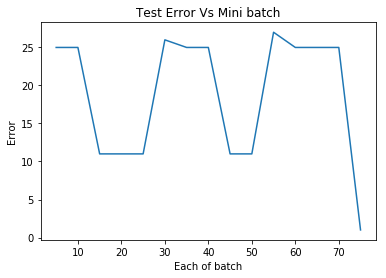

In [65]:
plt.title('Test Error Vs Mini batch')
plt.xlabel('Each of batch')
plt.ylabel('Error')
plt.plot(mini_batch, Error)
plt.show()

### 8.3
Set the learning rate η to .1, and train the multiclass perceptron on the provided training data. After processing every 5 training data points (also known as a mini-batch), evaluate the error of the current model on the test data. Plot the error of the test data vs the number of mini-batches, and include it in your Jupyter Notebook file for Question 8.

In [66]:
test_data = random_test.iloc[:, 0:-1]
test_label = random_test.iloc[:, -1].tolist()

In [67]:
def binary_predict(testData, weight, testLabel = None):
        
    """
    Change the layer based on the predict result. 
    
    Arguments:
    testData -- Predicted data set
    weight -- the result of binary_layer function

    Return:
    label -- new label
    """
    
    pred = dot(testData, weight)
    label = [1 if i > 0 else -1 for i in pred]
    return label

In [68]:
def binary_layer(trainData, trainLabel, num = 100, learning_rate= 0.1):
            
    """
    Update the weight. 
    
    Arguments:
    trainData & trainLabel-- Predicted data set
    learning_rate= 0.1
    
    Return:
    label -- new layer
    
    """
    
    layer = sorted(list(set(trainLabel)))[0]
    weight = np.random.rand(4)
    trainLabel = [1 if x == layer else -1 for x in trainLabel]
    #counter = 0
    #print (trainLabel)
    
    while num > 0:
        for i in range(len(trainData)):
            pred = dot(trainData.iloc[i], weight)
            
            #change to the layer
            if pred > 0:
                pred = 1
            else:
                pred = -1
                
            #update the weights
            if pred != trainLabel[i]:
                for ith_weight in range(len(weight)):
                    weight[ith_weight] += 0.1 * trainData.iloc[i, ith_weight] * trainLabel[i]
        num -= 1
    pred = dot(trainData, weight)
    lab = [1 if i >=0 else -1 for i in pred]
    
    return weight
        

In [69]:
data_c1_c2 = random_train.loc[random_train['y'].isin(['C1', 'C2'])].reset_index(drop = True)
data_c1_c3 = random_train.loc[random_train['y'].isin(['C1', 'C3'])].reset_index(drop = True)
data_c2_c3 = random_train.loc[random_train['y'].isin(['C2', 'C3'])].reset_index(drop = True)

In [70]:
label_c1_c2 = data_c1_c2.iloc[:, -1].tolist()
label_c1_c3 = data_c1_c3.iloc[:, -1].tolist()
label_c2_c3 = data_c2_c3.iloc[:, -1].tolist()

In [71]:
data_c1_c2 = data_c1_c2.iloc[:,0 :-1]
data_c1_c3 = data_c1_c3.iloc[:,0 :-1]
data_c2_c3 = data_c2_c3.iloc[:,0 :-1]

In [72]:
weight_c1_c2 = binary_layer(data_c1_c2, label_c1_c2)
weight_c1_c3 = binary_layer(data_c1_c3, label_c1_c3)
weight_c2_c3 = binary_layer(data_c2_c3, label_c2_c3)

In [73]:
test_data = random_test.iloc[:, 0:-1]

In [74]:
test_c1_c2 = binary_predict(test_data, weight_c1_c2)
test_c1_c3 = binary_predict(test_data, weight_c1_c3)
test_c2_c3 = binary_predict(test_data, weight_c2_c3)
print('The C1-C2 classfier for test_c1_c2:',test_c1_c2, '\n')
print('The C1-C3 classfier for test_c1_c3:',test_c1_c3, '\n')
print('The C2-C3 classfier for test_c2_c3:',test_c2_c3, '\n')

The C1-C2 classfier for test_c1_c2: [1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1] 

The C1-C3 classfier for test_c1_c3: [1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1] 

The C2-C3 classfier for test_c2_c3: [1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1] 



In [75]:
test_c1_c2 = ['C1' if x ==1 else 'C2' for x in test_c1_c2]
test_c1_c3 = ['C1' if x ==1 else 'C3' for x in test_c1_c3]
test_c2_c3 = ['C2' if x ==1 else 'C3' for x in test_c2_c3]

In [76]:
predict_label = []
for i in range(len(test_c1_c2)):
    label = []
    label.append(test_c1_c2[i])
    label.append(test_c1_c3[i])
    label.append(test_c2_c3[i])
    #print(label, '\n')
    if sorted(label) == sorted(list(set(label))):
        predict_label.append('confusion event')
    else:
        predict_label.append(max(set(label), key = label.count))
print(predict_label)

['C1', 'C2', 'C2', 'C1', 'C3', 'C3', 'C2', 'C3', 'C1', 'C1', 'C2', 'C1', 'C3', 'C1', 'C2', 'C2', 'C1', 'C2', 'C2', 'C1', 'C3', 'C1', 'C1', 'C2', 'C2', 'C3', 'C1', 'C3', 'C2', 'C3', 'C2', 'C3', 'C3', 'C3', 'C1', 'C3', 'C2', 'C2', 'C2', 'C1', 'C2', 'C3', 'C2', 'C3', 'C2', 'C1', 'C2', 'C1', 'C3', 'C2', 'C2', 'C3', 'C2', 'C3', 'C1', 'C1', 'C1', 'C2', 'C3', 'C2', 'C3', 'C1', 'C1', 'C1', 'C3', 'C1', 'C1', 'C2', 'C2', 'C1', 'C2', 'C2', 'C2', 'C1', 'C3']


### Q8-4-c. Did you expect to see a confusion event in the one-versus-one approach ? For how many test data points you have observed confusion? Why?

I expect to see a confusion event in the one-versus-one approach. One class is predicted as 1 and others is predcicted as -1, however, each class only a small part of the all data set. As a result, each prediction is likely closs to real label. In this dataset, there is no confusion event.